## Creating Additional Graphs for Across-Country Results

In [1]:
import pandas as pd
import os, re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Go through all the relevant csv in summary/ and add the means of each feature to a DataFrame

all_data = pd.DataFrame()
dir = 'summary/'
for file in os.listdir(dir):
    if re.match(r'^summary.\w*.csv$', file):
        name = file.split('.')[1].capitalize()
        if len(name) <= 2:
            name = name.upper()
        path = dir + file
        data = pd.read_csv(path, index_col='Name').mean().to_frame(name = name)
        all_data = pd.concat([all_data, data], axis=1)
all_data = all_data.T

plots/across-country/Number of EdgesNumber of Vertices.pdf


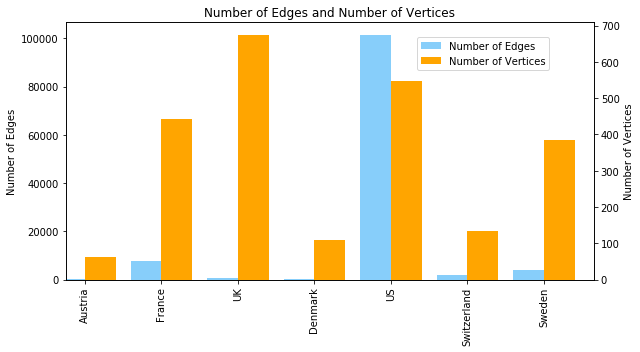

In [7]:
# Creating graph for number of edges and number of vertices

col1 = 'Number of Edges'
col2 = 'Number of Vertices'
data = all_data[[col1, col2]]

fig = plt.figure(figsize=(9,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

data[col1].plot(kind='bar', color='lightskyblue', ax=ax, width=width, position=1)
data[col2].plot(kind='bar', color='orange', ax=ax2, width=width, position=0)

ax.set_ylabel(col1)
ax2.set_ylabel(col2)
plt.title(col1 + ' and ' + col2)
fig.legend(loc=(0.65,0.8))
plt.tight_layout()

save_path = 'plots/across-country/' + col1 + col2 + '.pdf'
print(save_path)
fig.savefig(save_path)